<a href="https://www.kaggle.com/code/lostinworlds/time-series-analysis-share-price-of-manufactures?scriptVersionId=98376200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**A mini project examining the stock prices of Japanese manufacturers over the past 20 years.**

# Introduction

Working for a Japanese trading company in the aviation sector, leading Japanese manufactures such as KHI, IHI and MHI are frequently mentioned. In a global supply chain, wellbeing of these companies can be play a significant role for a plethora of companies who operate within the said supply chain.

As such, in this short project, the performance of their share price will be evaluated. 

# Overview 

The share price of the three companies can be secured from Yahoo Finance and this the maximum possible range of data as of 14th June 2022. 

* KHI's historical stock price data - https://uk.finance.yahoo.com/quote/7012.T/history?p=7012.T&.tsrc=fin-srch
* IHI's historical stock price data - https://uk.finance.yahoo.com/quote/7013.T/history?p=7013.T&.tsrc=fin-srch
* MHI's historical stock price data - https://uk.finance.yahoo.com/quote/7011.T/history?p=7011.T

The dataset includes the following variables (all prices in Japanese Yen): 
* Date (index)
* Opening price
* High price recorded for the day
* Lowest price recorded for the day
* Closing price
* Adjusted Closing price 
* Volume of trading

In [1]:
# Libraries for data handing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# library spercific to kaggle 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/share-price-data-for-japanese-manufacturers/KHI.csv
/kaggle/input/share-price-data-for-japanese-manufacturers/IHI.csv
/kaggle/input/share-price-data-for-japanese-manufacturers/MHI.csv


In [2]:
KHI = pd.read_csv("/kaggle/input/share-price-data-for-japanese-manufacturers/KHI.csv", index_col = "Date", parse_dates = True)
IHI = pd.read_csv("/kaggle/input/share-price-data-for-japanese-manufacturers/IHI.csv", index_col = "Date", parse_dates = True)
MHI = pd.read_csv("/kaggle/input/share-price-data-for-japanese-manufacturers/MHI.csv", index_col = "Date", parse_dates = True)

KHI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4358 entries, 2004-11-05 to 2022-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4358 non-null   float64
 1   High       4358 non-null   float64
 2   Low        4358 non-null   float64
 3   Close      4358 non-null   float64
 4   Adj Close  4358 non-null   float64
 5   Volume     4358 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 238.3 KB


In [3]:
IHI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5621 entries, 2000-01-04 to 2022-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5621 non-null   float64
 1   High       5621 non-null   float64
 2   Low        5621 non-null   float64
 3   Close      5621 non-null   float64
 4   Adj Close  5621 non-null   float64
 5   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 307.4 KB


In [4]:
MHI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5621 entries, 2000-01-04 to 2022-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5621 non-null   float64
 1   High       5621 non-null   float64
 2   Low        5621 non-null   float64
 3   Close      5621 non-null   float64
 4   Adj Close  5621 non-null   float64
 5   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 307.4 KB


Whilst the dataset is relatively large, it should be noted that the KHI's dataset is smaller than that for IHI and MHI. Examining the earliest recorded date releases that the oldest data for KHI is from 5th Nov 2004 whilst for the other two suppliers it is 4th Jan 2000.

In [5]:
print("KHI's data cover the priod between", KHI.index.min().date(),"and",KHI.index.max().date(),)
print("IHI's data cover the priod between", IHI.index.min().date(),"and",IHI.index.max().date(),)
print("MHI's data cover the priod between", MHI.index.min().date(),"and",MHI.index.max().date(),)

KHI's data cover the priod between 2004-11-05 and 2022-06-14
IHI's data cover the priod between 2000-01-04 and 2022-06-14
MHI's data cover the priod between 2000-01-04 and 2022-06-14


# Closing price fluctuations 
Using the graph functions in pandas, the yearly average closing prices can be plotted. It reveals that until the recession of in 2008, the prices for all three manufactures were rising. However, following the crash, for approx. 4 years the stock prices remained low. 

From 2012, the prices recorded a steady increase. For 2 manufactures, KHI and IHI, this lead to their stocks recording a higher price in 2015 out performing the highs before the financial crash. Based solely on this data, a definite conclusion on the cause of the increased stock price cannot be reached. It may be the global economic recovery but Abenomics lead by the prime minister of Japan was also introduced in 2012([Kenton, 2021](https://www.investopedia.com/terms/a/abenomics.asp#:~:text=Abenomics%20is%20the%20nickname%20for,the%20Japanese%20economy%20more%20competitive.)). 

There is also a decline in the prices in 2015. Whilst it was not significant as the 2008 recession, reports indicate that there was a mini recession from 2015 to 2016 ([New York Times, 2018](https://www.nytimes.com/2018/09/29/upshot/mini-recession-2016-little-known-big-impact.html)) ([Forbes, 2020](https://www.forbes.com/sites/bobcarlson/2020/02/24/are-we-repeating-2015-2016-in-the-economy-and-investment-markets/)). The impact of COVID can also be observed in the closing price fluctuations for 2020 with prices falling to levels similar to 2008 but slowly recovering in 2021. 

Interestingly, the most recent records for KHI appears to show a dip in the stock prices. Once again, based on solely this dataset, it is difficult to understand the possible causes. However, one possibility may be their portfolio and the ongoing economic uncertainty. For instance, KHI are involved in the production of TRENT XWB engines used in the Airbus A350 ([KHI, 2011](https://global.kawasaki.com/en/corp/newsroom/news/detail/20110323_1.html)). Such planes are designed for long haul flights ([Airbus,2022](https://www.airbus.com/en/products-services/commercial-aircraft/passenger-aircraft/a350-family)), which have struggled to recover since COVID due to a myriad of factors. 

An updated version of the graph with monthly averages rather than yearly average that there is significant fluctuations. Additionally, whilst this was not clear in the yearly version, in 2018, stock prices of  particularly IHI temporarily outperformed that of MHI which had consistently outperformed the two other manufactures. In fact, since 2015, MHI stocks appear to have been suffering. One factor for this may be issues with some of the some of their projects including the AIDAprima which was delayed ([Seatrade Cruise News, 2016](https://www.seatrade-cruise.com/news-headlines/mitsubishi-heavy-industries-breaks-silence-problems-its-cruise-newbuild-contracts)). 

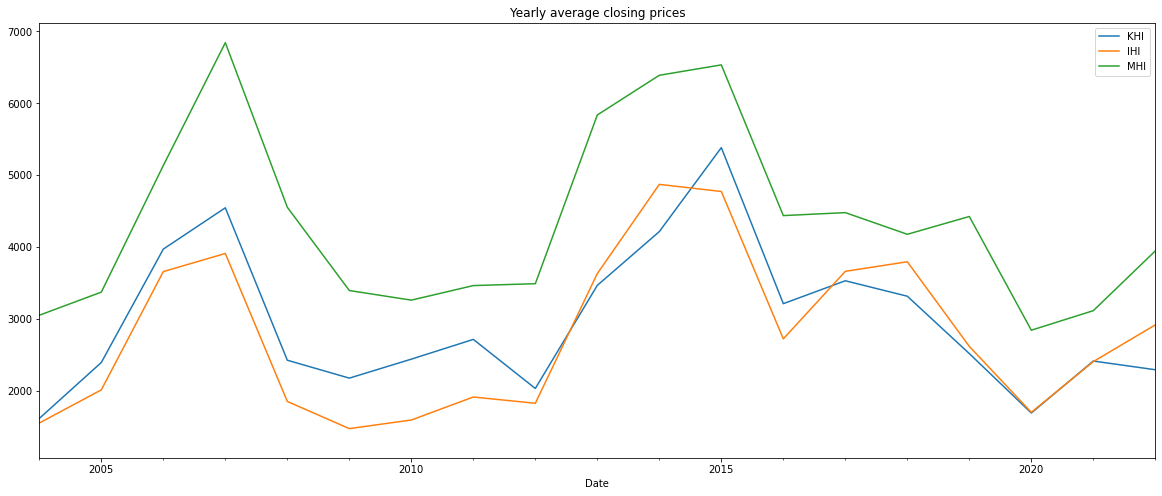

In [6]:
title = "Yearly average closing prices"

ax = KHI["Close"].resample(rule = "A").mean().plot.line(label = "KHI").legend(), 
IHI["Close"].resample(rule = "A").mean().plot.line(label = "IHI").legend(), 
MHI["Close"].resample(rule = "A").mean().plot.line(figsize = (20,8), title = title, xlim =["2004-11-5", "2022-12-31"],label = "MHI").legend();



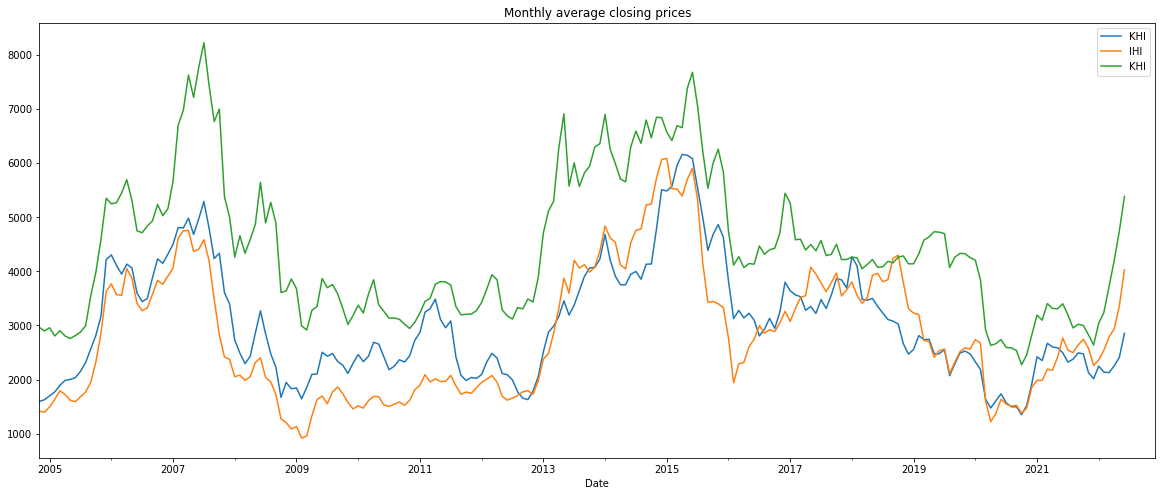

In [7]:
title = "Monthly average closing prices"

ax = KHI["Close"].resample(rule = "M").mean().plot.line(label = "KHI").legend(), 
IHI["Close"].resample(rule = "M").mean().plot.line(label = "IHI").legend(), 
MHI["Close"].resample(rule = "M").mean().plot.line(figsize = (20,8), title = title, xlim =["2004-11-5", "2022-12-31"], label = "KHI").legend();



In fact, looking at the peaks pre-2008 in the stock prices, MHI is the only manufacture that has failed to yet capture the prosperity of the era. For IHI and KHI, they were able to recover in approx. 4.5-5 years. Also, for these companies at the very least, their stock prices had begun to decrease in 2007, a year or so before the collapse of Lemon Brothers ([Lioudis, 2021](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp)). Therefore, these companies began experiencing the economic downturn by the time Bear Stearns were experiencing financial difficulty ([Chen, 2021](https://www.investopedia.com/terms/b/bear-stearns.asp)). 

## KHI Recovery

In [8]:
KHI_M = KHI.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

KHI_2008_peak = KHI_M.loc["2007-01-01": "2007-12-01"]

KHI_max = KHI_2008_peak["Close"].max()
KHI_2008_peak.idxmax()

Close   2007-07-23
dtype: datetime64[ns]

In [9]:
KHI_peak_close = KHI_M.loc["2007-07-23":]

In [10]:
KHI_peak_close[KHI_peak_close>= KHI_max].dropna().head()

,Close
Date,
2007-07-23,5680.0
2014-12-08,5780.0
2014-12-09,5680.0
2015-01-29,5690.0
2015-01-30,5690.0


In [11]:
print("KHI's Recovery in number of years = ", round((len(KHI_M.loc["2007-07-23":"2014-12-08"])/365),2)) 

KHI's Recovery in number of years =  4.95


## IHI Recovery

In [12]:
IHI_M = IHI.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

IHI_2008_peak = IHI_M.loc["2007-01-01": "2007-12-01"]

IHI_max = IHI_2008_peak["Close"].max()
IHI_2008_peak.idxmax()

Close   2007-02-26
dtype: datetime64[ns]

In [13]:
IHI_peak_close = IHI_M.loc["2007-02-26":]

In [14]:
IHI_peak_close[IHI_peak_close>= IHI_max].dropna().head()

,Close
Date,
2007-02-26,5060.0
2014-01-20,5070.0
2014-09-09,5130.0
2014-09-10,5090.0
2014-09-11,5090.0


In [15]:
print("IHI's Recovery in number of years = ", round((len(IHI_M.loc["2007-02-26":"2014-01-20"])/365),2)) 

IHI's Recovery in number of years =  4.63


## MHI Recovery

In [16]:
MHI_M = MHI.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

MHI_2008_peak = MHI_M.loc["2007-01-01": "2007-12-01"]

MHI_max = MHI_2008_peak["Close"].max()
MHI_2008_peak.idxmax()

Close   2007-07-23
dtype: datetime64[ns]

In [17]:
MHI_peak_close = MHI_M.loc["2007-02-26":]

In [18]:
MHI_peak_close[MHI_peak_close>= MHI_max].dropna().head()

,Close
Date,
2007-07-23,8970.0


# Trading Volume 
Examining the volume of trading, the shock of the 2008 recession can be clearly identified. It appears that stocks for IHI were specifically in large volumes followed by MHI. However even in 2022, MHI's trading volume remained relatively stable compared to IHI and KHI. IHI's trading volume also peaked in advance of KHI  

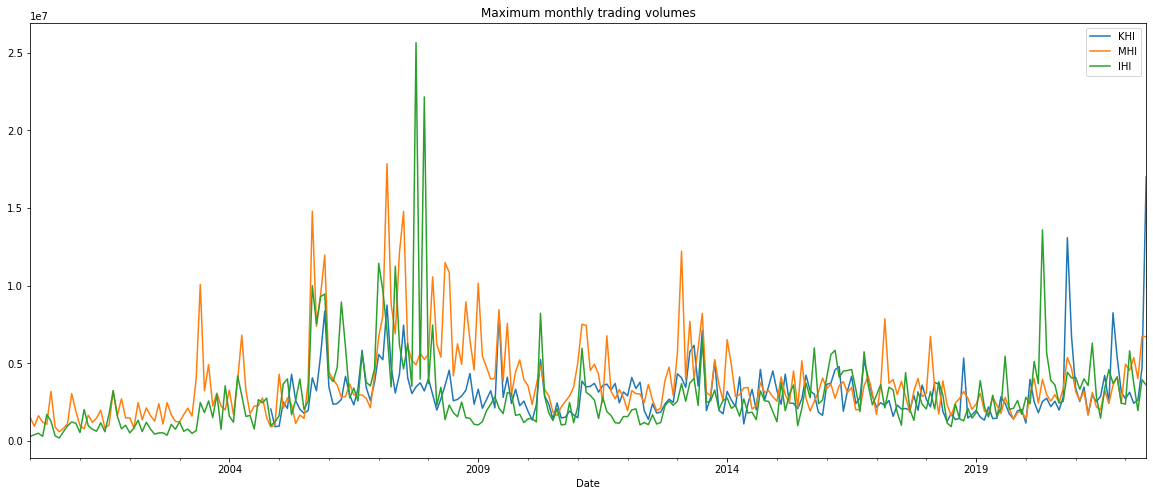

In [19]:
KHI["Volume"].resample(rule = "M").max().plot.line(figsize = (20,8), label = "KHI").legend();
MHI["Volume"].resample(rule = "M").max().plot.line(figsize = (20,8), label = "MHI").legend();
IHI["Volume"].resample(rule = "M").max().plot.line(figsize = (20,8), label = "IHI", title = "Maximum monthly trading volumes").legend();

# Moving Averages 
Below are 30 day moving averages for the respective manufacture. For all three manufactures, there are days where the stock prices performed significantly differently than the 30day moving average. One such instance was MHI's peak prior to the financial crash. This may be one reason why MHI was not able to recover their stock prices form that era. Their stocks before the recession may have been overvalued. 

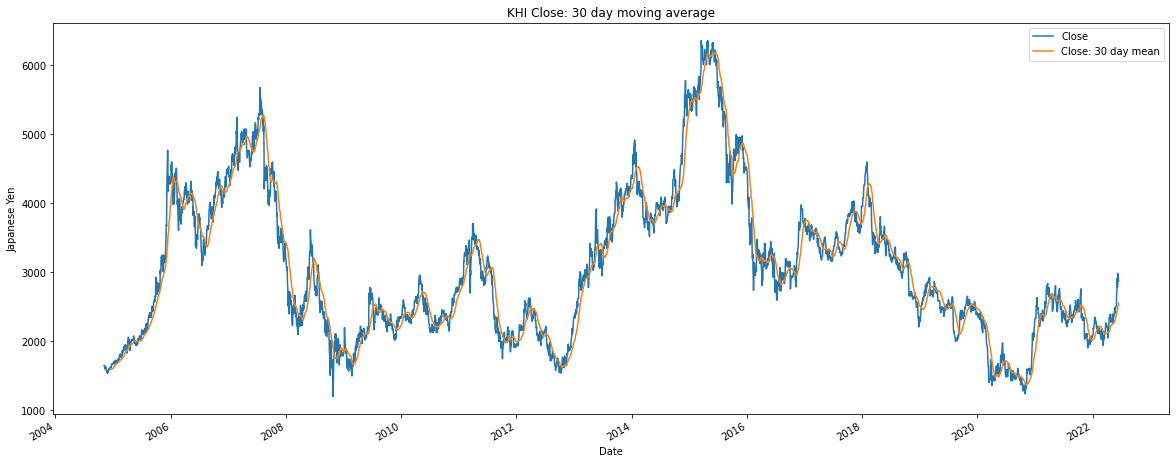

In [20]:
KHI["Close: 30 day mean"] = KHI["Close"].rolling(window = 30).mean()

ax = KHI[["Close", "Close: 30 day mean"]].plot(figsize = (20,8),title = "KHI Close: 30 day moving average")
ax.set_ylabel("Japanese Yen");

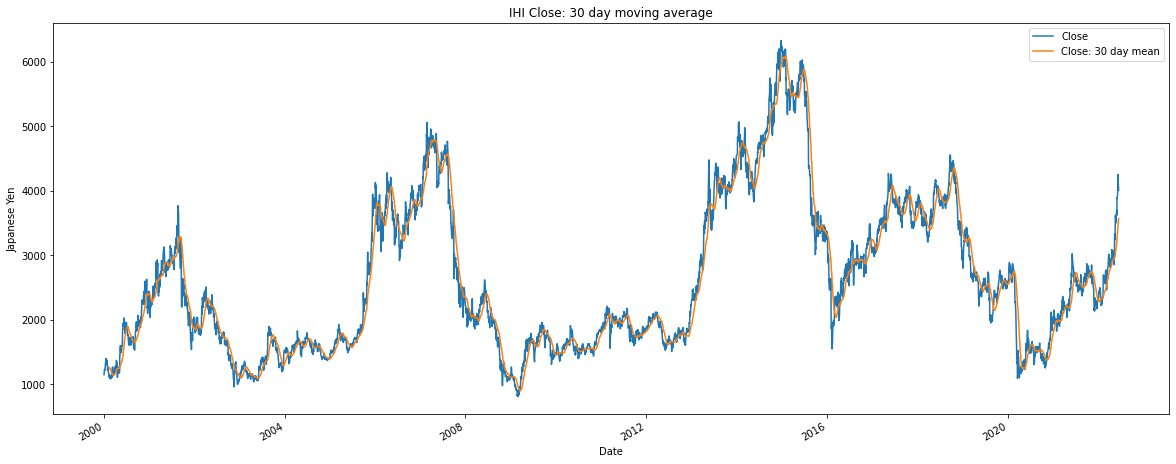

In [21]:
IHI["Close: 30 day mean"] = IHI["Close"].rolling(window = 30).mean()

ax = IHI[["Close", "Close: 30 day mean"]].plot(figsize = (20,8),title = "IHI Close: 30 day moving average")
ax.set_ylabel("Japanese Yen");

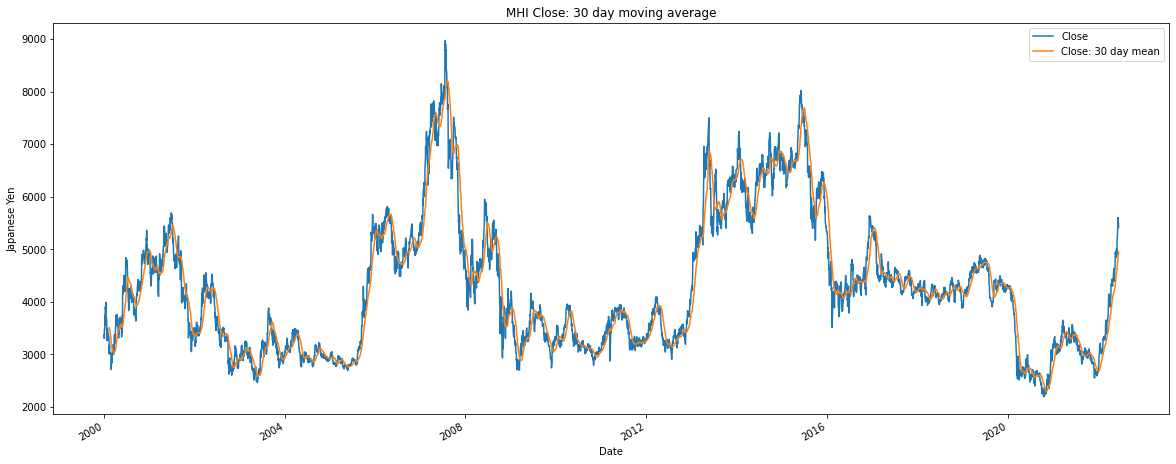

In [22]:
MHI["Close: 30 day mean"] = MHI["Close"].rolling(window = 30).mean()

ax = MHI[["Close", "Close: 30 day mean"]].plot(figsize = (20,8), title = "MHI Close: 30 day moving average")
ax.set_ylabel("Japanese Yen");

# Conclusion
This was a relatively short project comparing the stock prices of Japanese leading manufactures, IHI, KHI and MHI.

Whilst there are further research required to draw conclusions regarding the pattern, the fluctuations noted in the three manufacturers tend to mirror the global and domestic trends. This could be inferred as a reflection of the global nature of their operations and their reliance on factors beyond their immediate boarders.  